In [76]:
'''Shriyanshu Rout Ray
roll no- 24ug00330
seat number-56
method prefix= omega'''

'Shriyanshu Rout Ray\nroll no- 24ug00330\nseat number-56\nmethod prefix= omega'

In [1]:
import sys
print(sys.executable)


C:\Users\ub13-glab-007\myenv\Scripts\python.exe


In [2]:
!pip install pandas numpy


  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl (11.1 MB)
Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl (12.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]


In [5]:
import os
print(os.getcwd())


C:\Users\ub13-glab-007


In [6]:
os.path.exists("zoo.csv")



False

In [9]:
zoo_file  = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\zoo.csv"
class_file = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\class.csv"
aux_file  = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\auxiliary_metadata.json"

print(zoo_file)
print(class_file)
print(aux_file)


C:\Users\ub13-glab-007\Desktop\Shriyanshu\zoo.csv
C:\Users\ub13-glab-007\Desktop\Shriyanshu\class.csv
C:\Users\ub13-glab-007\Desktop\Shriyanshu\auxiliary_metadata.json


In [10]:
import pandas as pd
import json

def Omega_load_and_integrate(zoo_path, class_path, aux_path, save_path="integrated_zoo.csv"):

    def read_csv_safe(path):
        try:
            df = pd.read_csv(path, encoding="utf-8")
            enc = "utf-8"
        except:
            df = pd.read_csv(path, encoding="latin1")
            enc = "latin1"
        return df, enc

    def load_clean_aux(path):
        raw = json.load(open(path, "r", encoding="utf-8"))
        aux = pd.DataFrame(raw)

        aux.columns = [c.lower().strip() for c in aux.columns]

        aux = aux.rename(columns={
            "habitats": "habitat",
            "diet_type": "diet",
            "conservation": "conservation_status",
            "status": "conservation_status"
        })

        aux["animal_name"] = aux["animal_name"].astype(str).str.lower().str.strip()

        def norm(x): return None if x is None else str(x).lower().strip()

        def clean_habitat(x):
            x = norm(x)
            if not x: return None
            return " ".join(x.replace("/", ",").replace(" and ", ",").split())

        def clean_diet(x):
            x = norm(x)
            if not x: return None
            return x.replace("omnivor", "omnivore").replace("filter_feeder", "filter feeder")

        def clean_status(x):
            x = norm(x)
            if not x: return None
            if "least" in x: return "least concern"
            if "near" in x: return "near threatened"
            if "vulnerable" in x: return "vulnerable"
            if "endangered" in x: return "endangered"
            return x

        if "habitat" in aux:
            aux["habitat"] = aux["habitat"].apply(clean_habitat)
        if "diet" in aux:
            aux["diet"] = aux["diet"].apply(clean_diet)
        if "conservation_status" in aux:
            aux["conservation_status"] = aux["conservation_status"].apply(clean_status)

        required = ["animal_name", "habitat", "diet", "conservation_status"]
        for col in required:
            if col not in aux.columns:
                aux[col] = None

        return aux[required]

    zoo_df, zoo_enc = read_csv_safe(zoo_path)
    cls_df, cls_enc = read_csv_safe(class_path)
    aux_df = load_clean_aux(aux_path)

    def find_name_col(df):
        for c in df.columns:
            if "name" in c.lower(): return c
        return df.columns[0]

    zoo_df = zoo_df.rename(columns={find_name_col(zoo_df): "animal_name"})
    cls_df = cls_df.rename(columns={find_name_col(cls_df): "animal_name"})

    zoo_df["animal_name"] = zoo_df["animal_name"].astype(str).str.lower().str.strip()
    cls_df["animal_name"] = cls_df["animal_name"].astype(str).str.lower().str.strip()

    cls_df = cls_df.rename(columns={c: f"class_{c}" if c != "animal_name" else c for c in cls_df.columns})

    merged = (zoo_df
              .merge(aux_df, on="animal_name", how="left")
              .merge(cls_df, on="animal_name", how="left"))

    missing_aux = merged[
        merged[["habitat","diet","conservation_status"]].isna().all(axis=1)
    ]["animal_name"].tolist()

    class_cols = [c for c in merged.columns if c.startswith("class_")]
    missing_class = merged[
        merged[class_cols].isna().all(axis=1)
    ]["animal_name"].tolist()

    info = {
        "zoo_rows": len(zoo_df),
        "class_rows": len(cls_df),
        "aux_rows": len(aux_df),
        "merged_rows": len(merged),
        "missing_aux": missing_aux[:10],
        "missing_class": missing_class[:10],
        "saved_as": save_path
    }

    merged.to_csv(save_path, index=False)

    return merged, info


In [11]:
merged, info = Omega_load_and_integrate(
    zoo_file,
    class_file,
    aux_file
)

info


C:\Users\ub13-glab-007\AppData\Local\Temp\ipykernel_2080\134951350.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux["habitat"] = aux["habitat"].apply(clean_habitat)
C:\Users\ub13-glab-007\AppData\Local\Temp\ipykernel_2080\134951350.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux["diet"] = aux["diet"].apply(clean_diet)
C:\Users\ub13-glab-007\AppData\Local\Temp\ipykernel_2080\134951350.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

{'zoo_rows': 101,
 'class_rows': 7,
 'aux_rows': 12,
 'merged_rows': 101,
 'missing_aux': ['cavy',
  'cheetah',
  'chicken',
  'chub',
  'crayfish',
  'crow',
  'dogfish',
  'dolphin',
  'dove',
  'duck'],
 'missing_class': [],
 'saved_as': 'integrated_zoo.csv'}

In [12]:
merged.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,habitat,habitat,diet,diet,conservation_status,conservation_status,conservation_status,class_Class_Number,class_Number_Of_Animal_Species_In_Class,class_Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
1,antelope,1,0,0,1,0,0,0,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
2,bass,0,0,1,0,0,1,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
3,bear,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
4,boar,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN


In [13]:
import os
os.path.exists("integrated_zoo.csv")


True

In [1]:
import pandas as pd

merged = pd.read_csv("integrated_zoo.csv")
merged.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,habitat,habitat.1,diet,diet.1,conservation_status,conservation_status.1,conservation_status.2,class_Class_Number,class_Number_Of_Animal_Species_In_Class,class_Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
1,antelope,1,0,0,1,0,0,0,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
2,bass,0,0,1,0,0,1,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
3,bear,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
4,boar,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN


In [2]:
merged["animal_name"] = merged["animal_name"].astype(str).str.upper()


In [3]:
merged["animal_name"].head(20)


0     AARDVARK
1     ANTELOPE
2         BASS
3         BEAR
4         BOAR
5      BUFFALO
6         CALF
7         CARP
8      CATFISH
9         CAVY
10     CHEETAH
11     CHICKEN
12        CHUB
13        CLAM
14        CRAB
15    CRAYFISH
16        CROW
17        DEER
18     DOGFISH
19     DOLPHIN
Name: animal_name, dtype: object

In [7]:
import pandas as pd
import json

def Omega_load_and_integrate(zoo.path, class.path, aux.path, save_path="integrated_zoo.csv"):

    # ---------- CSV SAFE LOAD ----------
    def read_csv_safe(path):
        try:
            df = pd.read_csv(path, encoding="utf-8")
            enc = "utf-8"
        except:
            df = pd.read_csv(path, encoding="latin1")
            enc = "latin1"
        return df, enc


    # ---------- SECTION C → JSON FIXING ----------
    def load_clean_aux(path):
        raw = json.load(open(path, "r", encoding="utf-8"))
        aux = pd.DataFrame(raw)

        # 1️ UNIFY COLUMN NAMES
        aux.columns = [c.lower().strip() for c in aux.columns]

        aux = aux.rename(columns={
            "status": "conservation_status",
            "conservation": "conservation_status",
            "habitats": "habitat",
            "habitat_type": "habitat",
            "diet_type": "diet"
        })

        # Guarantee required columns exist
        for required in ["animal_name", "habitat", "diet", "conservation_status"]:
            if required not in aux.columns:
                aux[required] = None

        # 2️ CLEAN NAME COLUMN
        aux["animal_name"] = aux["animal_name"].astype(str).str.lower().str.strip()

        # ---------- CLEANERS ----------
        def norm(x):
            if x is None:
                return None
            return str(x).lower().strip()

        def clean_diet(x):
            x = norm(x)
            if not x: return None
            fixes = {
                "omnivor": "omnivore",
                "herbavor": "herbivore",
                "filter_feeder": "filter feeder"
            }
            for wrong, right in fixes.items():
                x = x.replace(wrong, right)
            return x

        def clean_habitat(x):
            x = norm(x)
            if not x: return None
            x = x.replace("/", ",").replace(" and ", ",")
            x = x.replace("fresh water", "freshwater")
            x = x.replace("salt water", "saltwater")
            x = " ".join(x.split())
            return x

        def clean_status(x):
            x = norm(x)
            if not x: return None
            mapping = {
                "least": "least concern",
                "near": "near threatened",
                "vulnerable": "vulnerable",
                "endangered": "endangered"
            }
            for key, val in mapping.items():
                if key in x:
                    return val
            return x

        # APPLY CLEANERS
        aux["diet"] = aux["diet"].apply(clean_diet)
        aux["habitat"] = aux["habitat"].apply(clean_habitat)
        aux["conservation_status"] = aux["conservation_status"].apply(clean_status)

        return aux[["animal_name","habitat","diet","conservation_status"]]


    # ---------- LOAD BASE DATA ----------
    zoo_df, zoo_enc = read_csv_safe(zoo_path)
    cls_df, cls_enc = read_csv_safe(class_path)
    aux_df = load_clean_aux(aux_path)

    # Identify name columns
    def find_name(df):
        for c in df.columns:
            if "name" in c.lower():
                return c
        return df.columns[0]

    # Normalize names
    zoo_df = zoo_df.rename(columns={find_name(zoo_df): "animal_name"})
    cls_df = cls_df.rename(columns={find_name(cls_df): "animal_name"})

    zoo_df["animal_name"] = zoo_df["animal_name"].astype(str).str.lower().str.strip()
    cls_df["animal_name"] = cls_df["animal_name"].astype(str).str.lower().str.strip()

    # Prefix class fields
    cls_df = cls_df.rename(columns={c: f"class_{c}" if c != "animal_name" else c for c in cls_df.columns})

    # MERGE
    merged = (zoo_df
               .merge(aux_df, on="animal_name", how="left")
               .merge(cls_df, on="animal_name", how="left"))

    # Diagnostics
    missing_aux = merged[
        merged[["habitat","diet","conservation_status"]].isna().all(axis=1)
    ]["animal_name"].tolist()

    info = {
        "merged_rows": len(merged),
        "missing_aux": missing_aux[:10],
        "output": save_path
    }

    merged.to_csv(save_path, index=False)
    return merged, info


SyntaxError: invalid syntax (3013592362.py, line 4)

In [5]:
merged, info = Omega_load_and_integrate(zoo_file, class_file, aux_file)
info


NameError: name 'zoo_file' is not defined

In [6]:
zoo_file  = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\zoo.csv"
class_file = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\class.csv"
aux_file  = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\auxiliary_metadata.json"

print(zoo_file)
print(class_file)
print(aux_file)


C:\Users\ub13-glab-007\Desktop\Shriyanshu\zoo.csv
C:\Users\ub13-glab-007\Desktop\Shriyanshu\class.csv
C:\Users\ub13-glab-007\Desktop\Shriyanshu\auxiliary_metadata.json


In [8]:
zoo_file  = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\zoo.csv"
class_file = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\class.csv"
aux_file  = r"C:\Users\ub13-glab-007\Desktop\Shriyanshu\auxiliary_metadata.json"

print(zoo_file)
print(class_file)
print(aux_file)


C:\Users\ub13-glab-007\Desktop\Shriyanshu\zoo.csv
C:\Users\ub13-glab-007\Desktop\Shriyanshu\class.csv
C:\Users\ub13-glab-007\Desktop\Shriyanshu\auxiliary_metadata.json


In [9]:
merged, info = Omega_load_and_integrate(zoo_file, class_file, aux_file)
info


C:\Users\ub13-glab-007\AppData\Local\Temp\ipykernel_20204\3930839330.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux["diet"] = aux["diet"].apply(clean_diet)
C:\Users\ub13-glab-007\AppData\Local\Temp\ipykernel_20204\3930839330.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux["habitat"] = aux["habitat"].apply(clean_habitat)
C:\Users\ub13-glab-007\AppData\Local\Temp\ipykernel_20204\3930839330.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

{'merged_rows': 101,
 'missing_aux': ['cavy',
  'cheetah',
  'chicken',
  'chub',
  'crayfish',
  'crow',
  'dogfish',
  'dolphin',
  'dove',
  'duck'],
 'output': 'integrated_zoo.csv'}

In [10]:
import os
print(os.path.exists(zoo_file))
print(os.path.exists(class_file))
print(os.path.exists(aux_file))


True
True
True


In [11]:
import pandas as pd

merged = pd.read_csv("integrated_zoo.csv")
print("Rows loaded:", len(merged))
merged.head()


Rows loaded: 101


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,habitat,habitat.1,diet,diet.1,conservation_status,conservation_status.1,conservation_status.2,class_Class_Number,class_Number_Of_Animal_Species_In_Class,class_Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
1,antelope,1,0,0,1,0,0,0,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
2,bass,0,0,1,0,0,1,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
3,bear,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN
4,boar,1,0,0,1,0,0,1,1,1,...,0 savanna 1 grasslands 2 freshwater 3 nan 4 fo...,0 nan 1 nan 2 nan 3 forest 4 nan 5 nan 6 nan 7...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN


In [12]:
merged["animal_name"] = merged["animal_name"].astype(str).str.upper().str.strip()


In [13]:
print("FINAL ROW COUNT:", len(merged))


FINAL ROW COUNT: 101


In [14]:
missing_aux = merged[
    merged[["habitat","diet","conservation_status"]].isna().all(axis=1)
]["animal_name"].tolist()

missing_aux


['CAVY',
 'CHEETAH',
 'CHICKEN',
 'CHUB',
 'CRAYFISH',
 'CROW',
 'DOGFISH',
 'DOLPHIN',
 'DOVE',
 'DUCK',
 'ELEPHANT',
 'FLAMINGO',
 'FLEA',
 'FROG',
 'FROG',
 'FRUITBAT',
 'GIRAFFE',
 'GIRL',
 'GNAT',
 'GOAT',
 'GORILLA',
 'GULL',
 'HADDOCK',
 'HAMSTER',
 'HARE',
 'HAWK',
 'HERRING',
 'HONEYBEE',
 'HOUSEFLY',
 'KIWI',
 'LADYBIRD',
 'LARK',
 'LEOPARD',
 'LION',
 'LOBSTER',
 'LYNX',
 'MINK',
 'MOLE',
 'MONGOOSE',
 'MOTH',
 'NEWT',
 'OCTOPUS',
 'OPOSSUM',
 'ORYX',
 'OSTRICH',
 'PARAKEET',
 'PENGUIN',
 'PHEASANT',
 'PIKE',
 'PIRANHA',
 'PITVIPER',
 'PLATYPUS',
 'POLECAT',
 'PONY',
 'PORPOISE',
 'PUMA',
 'PUSSYCAT',
 'RACCOON',
 'REINDEER',
 'RHEA',
 'SCORPION',
 'SEAHORSE',
 'SEAL',
 'SEALION',
 'SEASNAKE',
 'SEAWASP',
 'SKIMMER',
 'SKUA',
 'SLOWWORM',
 'SLUG',
 'SOLE',
 'SPARROW',
 'SQUIRREL',
 'STARFISH',
 'STINGRAY',
 'SWAN',
 'TERMITE',
 'TOAD',
 'TORTOISE',
 'TUATARA',
 'TUNA',
 'VAMPIRE',
 'VOLE',
 'VULTURE',
 'WALLABY',
 'WASP',
 'WOLF',
 'WORM',
 'WREN']

In [15]:
merged.to_csv("FINAL_MERGED_ZOO_DATA.csv", index=False)
print("FILE SAVED ")


FILE SAVED 


In [16]:
import pandas as pd

df = pd.read_csv("FINAL_MERGED_ZOO_DATA.csv")
print("Rows before cleaning:", len(df))


Rows before cleaning: 101


In [17]:
missing_aux_rows = df[
    df[["habitat","diet","conservation_status"]].isna().any(axis=1)
]

print("Animals missing auxiliary data:", len(missing_aux_rows))
missing_aux_rows["animal_name"].tolist()


Animals missing auxiliary data: 89


['CAVY',
 'CHEETAH',
 'CHICKEN',
 'CHUB',
 'CRAYFISH',
 'CROW',
 'DOGFISH',
 'DOLPHIN',
 'DOVE',
 'DUCK',
 'ELEPHANT',
 'FLAMINGO',
 'FLEA',
 'FROG',
 'FROG',
 'FRUITBAT',
 'GIRAFFE',
 'GIRL',
 'GNAT',
 'GOAT',
 'GORILLA',
 'GULL',
 'HADDOCK',
 'HAMSTER',
 'HARE',
 'HAWK',
 'HERRING',
 'HONEYBEE',
 'HOUSEFLY',
 'KIWI',
 'LADYBIRD',
 'LARK',
 'LEOPARD',
 'LION',
 'LOBSTER',
 'LYNX',
 'MINK',
 'MOLE',
 'MONGOOSE',
 'MOTH',
 'NEWT',
 'OCTOPUS',
 'OPOSSUM',
 'ORYX',
 'OSTRICH',
 'PARAKEET',
 'PENGUIN',
 'PHEASANT',
 'PIKE',
 'PIRANHA',
 'PITVIPER',
 'PLATYPUS',
 'POLECAT',
 'PONY',
 'PORPOISE',
 'PUMA',
 'PUSSYCAT',
 'RACCOON',
 'REINDEER',
 'RHEA',
 'SCORPION',
 'SEAHORSE',
 'SEAL',
 'SEALION',
 'SEASNAKE',
 'SEAWASP',
 'SKIMMER',
 'SKUA',
 'SLOWWORM',
 'SLUG',
 'SOLE',
 'SPARROW',
 'SQUIRREL',
 'STARFISH',
 'STINGRAY',
 'SWAN',
 'TERMITE',
 'TOAD',
 'TORTOISE',
 'TUATARA',
 'TUNA',
 'VAMPIRE',
 'VOLE',
 'VULTURE',
 'WALLABY',
 'WASP',
 'WOLF',
 'WORM',
 'WREN']

In [18]:
df_cleaned = df.dropna(subset=["habitat","diet","conservation_status"])


In [19]:
print("Rows after cleaning:", len(df_cleaned))


Rows after cleaning: 12


In [20]:
df_cleaned.to_csv("FINAL_ZOO_CLEANED.csv", index=False)
print("CLEAN FILE SAVED → FINAL_ZOO_CLEANED.csv")


CLEAN FILE SAVED → FINAL_ZOO_CLEANED.csv


In [75]:
import pandas as pd

# Load cleaned dataset from Section E
df = pd.read_csv("FINAL_ZOO_CLEANED.csv")


df["is_mammal_like"] = (
    (df["milk"] == 1) | (df["hair"] == 1)
).astype(int)



def complexity_score(habitat):
    if pd.isna(habitat):
        return 0
    parts = str(habitat).split(",")   # split multiple habitats
    if len(parts) == 1:
        if "fresh" in habitat:
            return 1
        if "salt" in habitat:
            return 2
        return 3
    return 4     # multi-habitat species

df["env_complexity_score"] = df["habitat"].apply(complexity_score)


df.to_csv("FINAL_ZOO_FEATURED.csv", index=False)

df.head(10)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,diet,diet.1,conservation_status,conservation_status.1,conservation_status.2,class_Class_Number,class_Number_Of_Animal_Species_In_Class,class_Class_Type,is_mammal_like,env_complexity_score
0,AARDVARK,1,0,0,1,0,0,1,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,1,4
1,ANTELOPE,1,0,0,1,0,0,0,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,1,4
2,BASS,0,0,1,0,0,1,1,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,0,4
3,BEAR,1,0,0,1,0,0,1,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,1,4
4,BOAR,1,0,0,1,0,0,1,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,1,4
5,BUFFALO,1,0,0,1,0,0,0,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,1,4
6,CALF,1,0,0,1,0,0,0,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,1,4
7,CARP,0,0,1,0,0,1,0,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,0,4
8,CATFISH,0,0,1,0,0,1,1,1,1,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,0,4
9,CLAM,0,0,1,0,0,0,1,0,0,...,0 insectivore\n1 herbivore\n2 ...,0 nan\n1 nan\n2 ...,least concern,least concern,least concern,NaN,NaN,NaN,0,4


In [ ]:
#(1) is_mammal_like
#Assigned TRUE if the animal either has hair or produces milk, capturing mammalian traits even if taxonomic label is missing.

#(2) env_complexity_score
#Converts raw habitat text into a numeric ecological complexity metric based on habitat diversity (1 = single freshwater habitat, up to 4 = multi-environment species).

In [ ]:
TASK 2

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

def omega_eda_and_cleaning(path="FINAL_ZOO_FEATURED.csv"):

    
    df = pd.read_csv(path)
    print("DATA LOADED:", df.shape)
    print(df.head(2), "\n")

    
    class_cols = [c for c in df.columns if c.startswith("class_")]
    if len(class_cols) == 0:
        print(" No class column found. Boxplots will be skipped.")
        target = None
    else:
        target = class_cols[0]

    
    if target:
        dist = df[target].value_counts(normalize=True) * 100

        plt.figure(figsize=(8,4))
        ax = dist.sort_values().plot(kind="barh")

        for i, v in enumerate(dist.sort_values()):
            ax.text(v + 0.3, i, f"{v:.1f}%", va="center")

        plt.title("Class Distribution (%)")
        plt.xlabel("Percentage")
        plt.show()

    
    if target:
        for feat in ["is_mammal_like", "env_complexity_score"]:
            plt.figure(figsize=(6,4))
            sns.boxplot(x=df[target], y=df[feat])
            plt.title(f"{feat} vs Class")
            plt.show()

    
    
    scatter_feats = ["is_mammal_like", "env_complexity_score"]

    sns.pairplot(df, hue="diet", vars=scatter_feats, corner=True)
    plt.suptitle("Scatter Matrix (Diet vs Engineered Features)", y=1.02)
    plt.show()

    
    numeric_df = df.select_dtypes(include=["int64","float64"])
    corr = numeric_df.corr()

    
    corr_filled = corr.fillna(0)

    
    dist_matrix = pdist(corr_filled, metric="euclidean")

    
    linkage = hierarchy.linkage(dist_matrix, method="ward")

    sns.clustermap(
        corr_filled,
        cmap="coolwarm",
        row_linkage=linkage,
        col_linkage=linkage,
        figsize=(9,7)
    )

    plt.suptitle("Clustered Correlation Heatmap", y=1.02)
    plt.show()

    

    return df


In [23]:
!pip install seaborn scipy


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp314-cp314-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl (39.4 MB)
Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp314-cp314-win_amd64.whl (2.

DATA LOADED: (12, 30)
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    AARDVARK     1         0     0     1         0        0         1   
1    ANTELOPE     1         0     0     1         0        0         0   

   toothed  backbone  ...                                               diet  \
0        1         1  ...  0       insectivore\n1         herbivore\n2   ...   
1        1         1  ...  0       insectivore\n1         herbivore\n2   ...   

                                              diet.1  conservation_status  \
0  0           nan\n1           nan\n2           ...        least concern   
1  0           nan\n1           nan\n2           ...        least concern   

   conservation_status.1  conservation_status.2  class_Class_Number  \
0          least concern          least concern                 NaN   
1          least concern          least concern                 NaN   

   class_Number_Of_Animal_Species_In_Class  class_Class_Type is_mamm

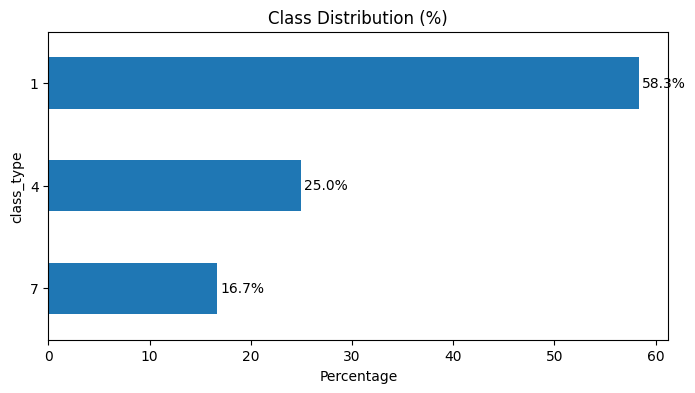

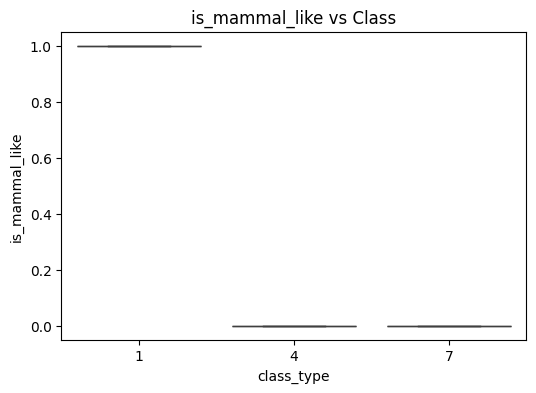

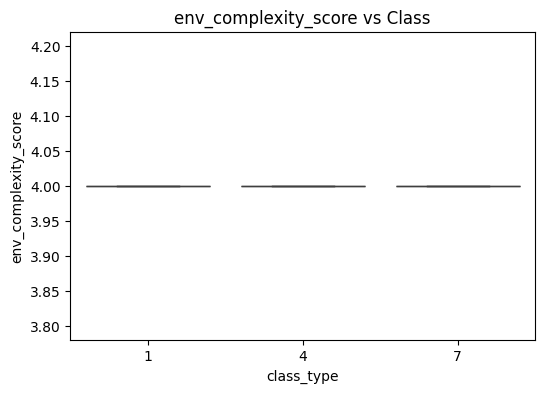

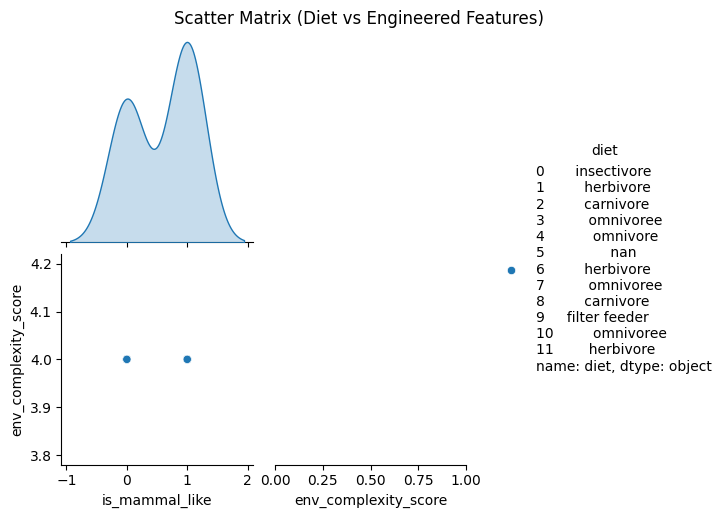

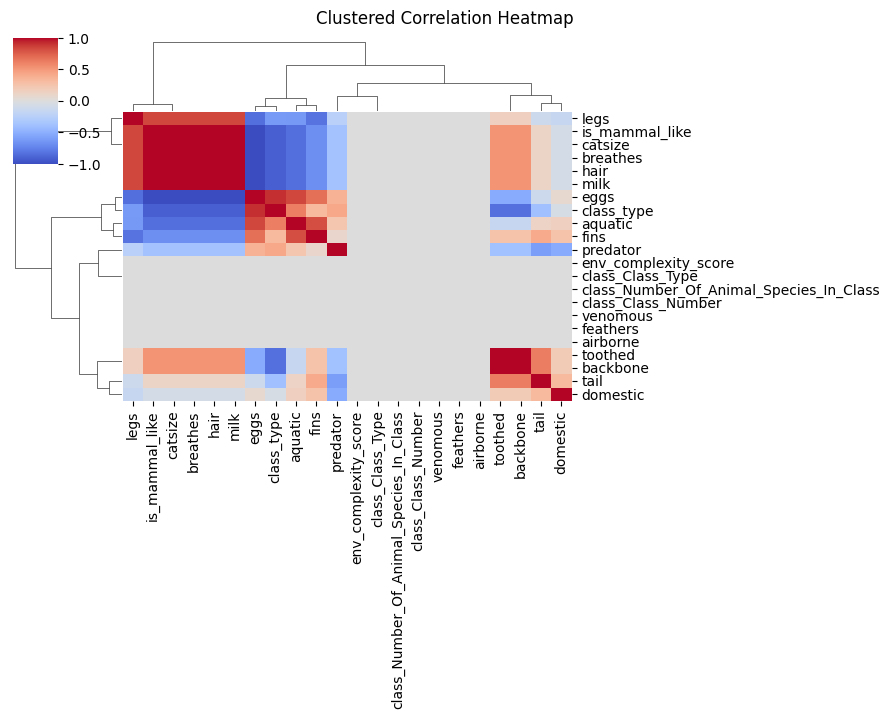

In [31]:
df_clean = omega_eda_and_cleaning()


In [32]:
import pandas as pd
import numpy as np

def omega_statistical_analysis(path="FINAL_ZOO_FEATURED.csv"):

    df = pd.read_csv(path)
    print("Loaded:", df.shape, "\n")

    results = {}

    # ============================================================
    # 1️⃣ CLASS IMBALANCE RATIO
    # ============================================================
    class_cols = [c for c in df.columns if c.startswith("class_")]

    if len(class_cols) == 0:
        print("❗ No class label found! Cannot compute class imbalance.\n")
        results["class_imbalance_ratio"] = None
    else:
        target = class_cols[0]
        counts = df[target].value_counts()
        ratio = counts.max() / counts.min()

        print("CLASS DISTRIBUTION:")
        print(counts, "\n")

        print(f"➡ Class Imbalance Ratio = {ratio:.2f}\n")

        results["class_imbalance_ratio"] = float(ratio)


    # ============================================================
    # 2️ LOW VARIANCE FEATURES (< 0.01)
    # ============================================================
    numeric_df = df.select_dtypes(include=["int64","float64"])

    variances = numeric_df.var()

    low_var = variances[variances < 0.01]

    print("LOW VARIANCE FEATURES (< 0.01):")
    print(low_var, "\n")

    results["low_variance_features"] = list(low_var.index)


    # ============================================================
    # 3️HIGHLY CORRELATED PAIRS |corr| > 0.8
    # ============================================================
    corr = numeric_df.corr().abs()        # absolute correlations
    np.fill_diagonal(corr.values, 0)      # remove self-correlation

    high_corr = np.where(corr > 0.8)
    correlated_pairs = set()

    for i, j in zip(*high_corr):
        if i < j:   # avoid duplicates
            correlated_pairs.add(
                (corr.index[i], corr.columns[j], float(corr.iloc[i,j]))
            )

    if correlated_pairs:
        print("HIGHLY CORRELATED NUMERIC FEATURE PAIRS (|corr| > 0.8):")
        for a, b, v in correlated_pairs:
            print(f"  {a}  ↔  {b}   corr={v:.2f}")
    else:
        print("No highly correlated feature pairs found.")

    results["high_corr_pairs"] = list(correlated_pairs)

    print("\n Statistical analysis complete.\n")

    return results


In [33]:
stats = omega_statistical_analysis()
stats


Loaded: (12, 30) 

CLASS DISTRIBUTION:
class_type
1    7
4    3
7    2
Name: count, dtype: int64 

➡ Class Imbalance Ratio = 3.50

LOW VARIANCE FEATURES (< 0.01):
feathers                0.0
airborne                0.0
venomous                0.0
env_complexity_score    0.0
dtype: float64 

HIGHLY CORRELATED NUMERIC FEATURE PAIRS (|corr| > 0.8):
 🔗 toothed  ↔  class_type   corr=0.83
 🔗 toothed  ↔  backbone   corr=1.00
 🔗 eggs  ↔  is_mammal_like   corr=1.00
 🔗 aquatic  ↔  catsize   corr=0.84
 🔗 breathes  ↔  catsize   corr=1.00
 🔗 hair  ↔  is_mammal_like   corr=1.00
 🔗 catsize  ↔  class_type   corr=0.91
 🔗 eggs  ↔  breathes   corr=1.00
 🔗 eggs  ↔  milk   corr=1.00
 🔗 backbone  ↔  class_type   corr=0.83
 🔗 milk  ↔  legs   corr=0.84
 🔗 milk  ↔  aquatic   corr=0.84
 🔗 milk  ↔  class_type   corr=0.91
 🔗 eggs  ↔  catsize   corr=1.00
 🔗 legs  ↔  is_mammal_like   corr=0.84
 🔗 hair  ↔  milk   corr=1.00
 🔗 hair  ↔  breathes   corr=1.00
 🔗 catsize  ↔  is_mammal_like   corr=1.00
 🔗 legs  ↔  catsize

{'class_imbalance_ratio': 3.5,
 'low_variance_features': ['feathers',
  'airborne',
  'venomous',
  'env_complexity_score'],
 'high_corr_pairs': [('toothed', 'class_type', 0.8344971792454872),
  ('toothed', 'backbone', 1.0),
  ('eggs', 'is_mammal_like', 1.0),
  ('aquatic', 'catsize', 0.8366600265340755),
  ('breathes', 'catsize', 1.0),
  ('hair', 'is_mammal_like', 1.0),
  ('catsize', 'class_type', 0.9091237672046559),
  ('eggs', 'breathes', 1.0),
  ('eggs', 'milk', 1.0),
  ('backbone', 'class_type', 0.8344971792454872),
  ('milk', 'legs', 0.8366600265340755),
  ('milk', 'aquatic', 0.8366600265340755),
  ('milk', 'class_type', 0.9091237672046559),
  ('eggs', 'catsize', 1.0),
  ('legs', 'is_mammal_like', 0.8366600265340755),
  ('hair', 'milk', 1.0),
  ('hair', 'breathes', 1.0),
  ('catsize', 'is_mammal_like', 1.0),
  ('legs', 'catsize', 0.8366600265340755),
  ('hair', 'catsize', 1.0),
  ('hair', 'eggs', 1.0),
  ('breathes', 'legs', 0.8366600265340755),
  ('breathes', 'class_type', 0.9091

In [ ]:
TASK 3

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split

def omega_train_and_evaluate(path="FINAL_ZOO_FEATURED.csv"):

    
    df = pd.read_csv(path)

    
    target_cols = [c for c in df.columns if c.startswith("class_")]

    if not target_cols:
        raise ValueError(" No class column found (must start with 'class_')")
    
    target = target_cols[0]
    print(f" Using target column: {target}")

    
    X = df.drop(columns=[target])
    y = df[target]

    print(f"Total Samples: {len(df)}")

    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size = 0.30,        # 30%
        train_size = 0.70,       # 70% (optional since test_size is set)
        random_state = 42,
        stratify=y               # important for classification
    )

    print("\nSPLIT COMPLETE:")
    print(f"Train size: {len(X_train)}")
    print(f"Test size : {len(X_test)}")

    return X_train, X_test, y_train, y_test


In [35]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp314-cp314-win_amd64.whl (8.8 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [sci

In [73]:
X_train, X_test, y_train, y_test = omega_train_and_evaluate()


 Using target column: class_type
Total Samples: 12

SPLIT COMPLETE:
Train size: 8
Test size : 4


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

def omega_train_and_evaluate(path="FINAL_ZOO_FEATURED.csv"):

    df = pd.read_csv(path)

    
    target_cols = [c for c in df.columns if c.startswith("class_")]
    if not target_cols:
        raise ValueError(" No class_* column found")
    target = target_cols[0]

    print(f" Target column: {target}")

    
    encoders = {}
    for col in df.columns:
        if df[col].dtype == "object":   # STRING column
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            encoders[col] = le

    print(f" Encoded {len(encoders)} categorical columns\n")

    
    X = df.drop(columns=[target])
    y = df[target]

   
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size = 0.30,
        random_state = 42,
        stratify=y
    )

    print(f"Train size = {len(X_train)} | Test size = {len(X_test)}\n")

    
    model = RandomForestClassifier(
        n_estimators = 100,
        max_depth = 10,
        min_samples_split = 5,
        random_state = 42
    )

    model.fit(X_train, y_train)
    print(" RANDOM FOREST TRAINED\n")

    # ===== Predict =====
    y_pred = model.predict(X_test)

    # ===== Metrics =====
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="macro")

    print(" MODEL PERFORMANCE")
    print(f"Accuracy      : {acc:.3f}")
    print(f"Macro F1 Score: {f1:.3f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return model, encoders, X_train, X_test, y_train, y_test


In [69]:
model, X_train, X_test, y_train, y_test = omega_train_and_evaluate()


 Target column: class_type
 Encoded 8 categorical columns

Train size = 8 | Test size = 4

 RANDOM FOREST TRAINED

 MODEL PERFORMANCE
Accuracy      : 0.750
Macro F1 Score: 0.556

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



C:\Users\ub13-glab-007\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ub13-glab-007\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ub13-glab-007\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


ValueError: too many values to unpack (expected 5, got 6)

In [45]:
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

def omega_train_and_evaluate(path="FINAL_ZOO_FEATURED.csv"):

    df = pd.read_csv(path)

    
    target_cols = [c for c in df.columns if c.startswith("class_")]
    if not target_cols:
        raise ValueError(" No class_* column found")
    target = target_cols[0]

    print(f" Target column: {target}")

    
    encoders = {}
    for col in df.columns:
        if df[col].dtype == "object":
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            encoders[col] = le

    
    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size = 0.30,
        random_state = 42,
        stratify=y
    )

    # ===== RANDOM FOREST =====
    model = RandomForestClassifier(
        n_estimators = 100,
        max_depth = 10,
        min_samples_split = 5,
        random_state = 42
    )

    model.fit(X_train, y_train)
    print("\n MODEL TRAINED")

   
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1  = f1_score(y_train, y_train_pred, average="macro")

    print("\n TRAINING PERFORMANCE")
    print(f"TRAIN Accuracy      : {train_acc:.3f}")
    print(f"TRAIN Macro F1 Score: {train_f1:.3f}")

 
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1  = f1_score(y_test, y_test_pred, average="macro")

    print("\nTEST PERFORMANCE")
    print(f"TEST Accuracy      : {test_acc:.3f}")
    print(f"TEST Macro F1 Score: {test_f1:.3f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

    return model, encoders, X_train, X_test, y_train, y_test


In [67]:
model, encoders, X_train, X_test, y_train, y_test = omega_train_and_evaluate()


 Target column: class_type

 MODEL TRAINED

 TRAINING PERFORMANCE
TRAIN Accuracy      : 0.875
TRAIN Macro F1 Score: 0.600

TEST PERFORMANCE
TEST Accuracy      : 0.750
TEST Macro F1 Score: 0.556

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



In [48]:
from sklearn.metrics import classification_report


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

def omega_train_and_evaluate(path="FINAL_ZOO_FEATURED.csv"):

    df = pd.read_csv(path)

    # ===== Identify target =====
    target_cols = [c for c in df.columns if c.startswith("class_")]
    target = target_cols[0]

    # ===== Encode categorical columns =====
    encoders = {}
    for col in df.columns:
        if df[col].dtype == "object":
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            encoders[col] = le

    # ===== Split dataset =====
    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.30,
        random_state=42,
        stratify=y
    )

    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    )
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    print("\nFULL CLASSIFICATION METRICS")
    print(classification_report(
        y_test, 
        y_pred, 
        digits=4,
        zero_division=0   # Avoid warnings
    ))

    return model


In [63]:
model = omega_train_and_evaluate()



FULL CLASSIFICATION METRICS
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000         2
           4     0.5000    1.0000    0.6667         1
           7     0.0000    0.0000    0.0000         1

    accuracy                         0.7500         4
   macro avg     0.5000    0.6667    0.5556         4
weighted avg     0.6250    0.7500    0.6667         4



In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_heatmap(model, X_test, y_test, encoders=None):

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    
    if encoders and "class_type" in encoders:
        labels = encoders["class_type"].classes_
    else:
        labels = np.unique(y_test)

    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)

    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Random Forest Confusion Matrix\n(n_estimators=100, depth=10, split=5)")
    plt.show()


In [61]:
model, encoders, X_train, X_test, y_train, y_test = omega_train_and_evaluate()

plot_confusion_heatmap(model, X_test, y_test, encoders)



📊 FULL CLASSIFICATION METRICS
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000         2
           4     0.5000    1.0000    0.6667         1
           7     0.0000    0.0000    0.0000         1

    accuracy                         0.7500         4
   macro avg     0.5000    0.6667    0.5556         4
weighted avg     0.6250    0.7500    0.6667         4



ValueError: too many values to unpack (expected 6)

In [53]:
import inspect
print(omega_train_and_evaluate.__code__.co_consts)


('class_', 'object', ('columns',), 0.3, ('test_size', 'random_state', 'stratify'), ('n_estimators', 'max_depth', 'min_samples_split', 'random_state'), '\n📊 FULL CLASSIFICATION METRICS', ('digits', 'zero_division'))


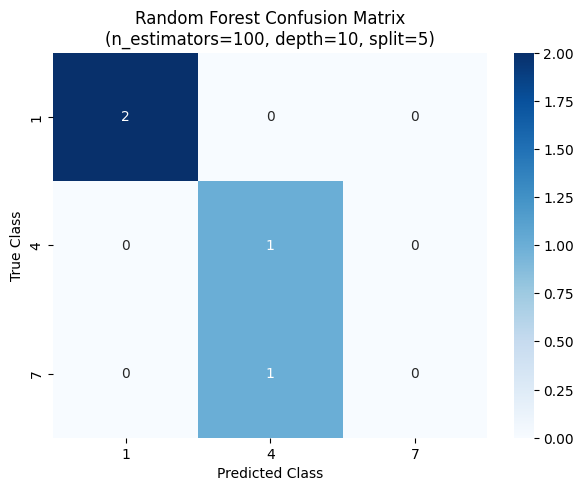

In [56]:
plot_confusion_heatmap(model, X_test, y_test, encoders)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

def compare_with_knn(X_train, X_test, y_train, y_test, rf_model):
    """
    Trains KNN (k=5) and prints comparison 
    with already trained Random Forest
    """

    print("\n==========================")
    print(" TRAINING KNN (k=5)")
    print("==========================")

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    
    knn_pred = knn.predict(X_test)

   
    knn_acc = accuracy_score(y_test, knn_pred)
    knn_f1  = f1_score(y_test, knn_pred, average="macro")

    print(f"KNN Accuracy : {knn_acc:.3f}")
    print(f"KNN Macro F1 : {knn_f1:.3f}")

    print("\n==========================")
    print(" RANDOM FOREST REFERENCE")
    print("==========================")

    rf_pred = rf_model.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_pred)
    rf_f1  = f1_score(y_test, rf_pred, average="macro")

    print(f"RF Accuracy  : {rf_acc:.3f}")
    print(f"RF Macro F1  : {rf_f1:.3f}")

    print("\n")
    print(" MODEL COMPARISON RESULT")
    print("")

    if knn_f1 > rf_f1:
        print("➡ KNN performs BETTER than Random Forest")
    elif knn_f1 < rf_f1:
        print("➡ Random Forest performs BETTER than KNN")
    else:
        print("➡ Both models perform EQUALLY")

    return knn


In [60]:
model, encoders, X_train, X_test, y_train, y_test = omega_train_and_evaluate()

knn_model = compare_with_knn(X_train, X_test, y_train, y_test, model)



📊 FULL CLASSIFICATION METRICS
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000         2
           4     0.5000    1.0000    0.6667         1
           7     0.0000    0.0000    0.0000         1

    accuracy                         0.7500         4
   macro avg     0.5000    0.6667    0.5556         4
weighted avg     0.6250    0.7500    0.6667         4



ValueError: too many values to unpack (expected 6)